## Observations and Insights 

In [108]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
# mouse_metadata_path = "data/Mouse_metadata.csv"
# study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv("data/Mouse_metadata.csv")
study_results = pd.read_csv("data/Study_results.csv")

# Combine the data into a single dataset
combined_results = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
combined_results

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [109]:
# Checking the number of mice.
combined_results["Mouse ID"].nunique()


249

In [110]:
# Getting the duplicate mice by ID number that shows up for Mouse ID 
# and Timepoint. 
#look up "duplicated" results to find out which mice had duplicate timepoints/IDs 
#in combined_results dataframes, should be less than 20 mice
# Selecting duplicate rows except first occurrence based on all columns
duplicates = combined_results[combined_results.duplicated()]
  
print("Duplicate Rows :")
  
# Print the resultant Dataframe
duplicates



Duplicate Rows :


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.0,0


In [111]:
# Optional: Get all the data for the duplicate mouse ID. use loc to find out how long each 
#mice lived or how many rows they appearead in
duplicate_rows = combined_results.loc[combined_results["Mouse ID"] == "g989"]
duplicate_rows


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [112]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID. Drop rows which have same Mice ID and time point and keep first entry

#clean_results = combined_results.drop_duplicates(
#subset = ["Mouse ID", "Timepoint"]), ("Mouse ID" != "g989"), keep = "first").reset_index(drop = True)
#clean_df = combined_results[combined_results['Mouse ID'].isin(duplicates)==False]
clean_results = combined_results.loc[combined_results["Mouse ID"] != "g989"]
clean_results
  
# print latest dataframe


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [113]:
# Checking the number of mice in the clean DataFrame.
clean_results["Mouse ID"].nunique()

248

## Summary Statistics

In [114]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen. 
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

mean = clean_results.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = clean_results.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance = clean_results.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
standard_dv = clean_results.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem = clean_results.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

summary_df = pd.DataFrame({"Mean": mean, "Median": median, "Variance": variance, "Standard Deviation": standard_dv, "SEM": sem})
summary_df


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [115]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line

summary_stats = clean_results.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].agg(Mean='mean', Median='median', Variance='var', StandardDeviation='std', SEM='sem')
summary_stats.rename(columns={"StandardDeviation": "Standard Deviation"}, inplace=True)
summary_stats

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [129]:
timepoints = pd.DataFrame(combined_results.groupby(["Drug Regimen"]).count()["Timepoint"]).reset_index()
timepoints
gender = combined_results["Sex"].value_counts()
#pd.DataFrame(combined_results.groupby(["Sex"]).reset_index())

[Text(0, 0, 'Capomulin'),
 Text(1, 0, 'Ceftamin'),
 Text(2, 0, 'Infubinol'),
 Text(3, 0, 'Ketapril'),
 Text(4, 0, 'Naftisol'),
 Text(5, 0, 'Placebo'),
 Text(6, 0, 'Propriva'),
 Text(7, 0, 'Ramicane'),
 Text(8, 0, 'Stelasyn'),
 Text(9, 0, 'Zoniferol')]

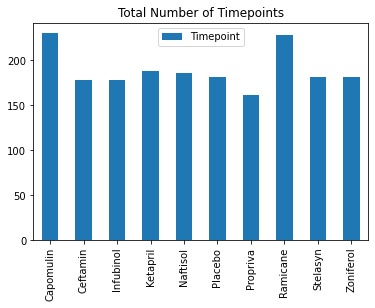

In [128]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
barplot = timepoints.plot(kind="bar", figsize=(6,4))

plt.title("Total Number of Timepoints")
barplot.set_xticklabels(timepoints["Drug Regimen"], rotation=90)


Text(0, 0.5, 'Timepoints')

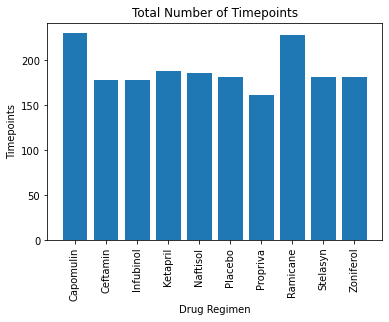

In [118]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x_axis = timepoints["Drug Regimen"]
y_axis = timepoints["Timepoint"]
plt.bar(x_axis, y_axis)
plt.xticks(rotation="vertical")
plt.title("Total Number of Timepoints")
plt.xlabel("Drug Regimen")
plt.ylabel("Timepoints")

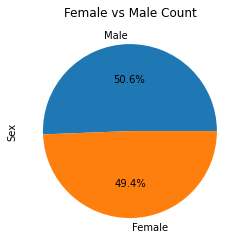

In [137]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_pie = gender.plot(kind="pie", y='gender', autopct='%1.1f%%', legend = False, title=("Female vs Male Count"))
#gender_pie.set_ylabel("Gender Count")

([<matplotlib.patches.Wedge at 0x1cc10e3ccd0>,
 [Text(-0.02099250347258543, 1.0997996703027118, 'Male'),
  Text(0.020992503472585782, -1.0997996703027118, 'Female')],
 [Text(-0.01145045643959205, 0.5998907292560246, '50.6%'),
  Text(0.011450456439592244, -0.5998907292560246, '49.4%')])

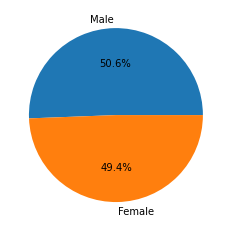

In [138]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
Male = gender["Male"]
Female = gender["Female"]
sizes = gender
labels = ["Male", "Female"]
plt.pie(sizes, labels=labels, autopct='%1.1f%%')

## Quartiles, Outliers and Boxplots

In [135]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
cap_tumor = clean_results.loc(["Drug Regimen"] == "Capomulin")
#["Tumor Volume (mm3)"]
cap_tumor
#max_tumor = clean_results["Drug Regimen"]()
# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [122]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [123]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [124]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [125]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [126]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
#correlation coefficient is 0.84